# Library

In [3]:
%matplotlib inline
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import codecs
import pandas as pd

### Importation des données 

In [6]:
df =  pd.read_csv("C:\\Users\\actou\\OneDrive\\Documents\\IODAA\\Notebook_ML\\Notebook_ML_IODAA_2022\\CC GENERAL.csv")

### Exploration du dataset

In [16]:
print("--> Le nombre de lignes est :", df.shape[0])
print("--> Le nombre de colonnes est :", df.shape[1])
print("----------")
df.describe()

--> Le nombre de lignes est : 8950
--> Le nombre de colonnes est : 18
----------


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##### Informations générales 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### Compter le nombre d'éléments distincts dans l'axe spécifié.

In [20]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

##### Calculer la corrélation par paires des colonnes, à l'exclusion des valeurs NA/null.

In [19]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


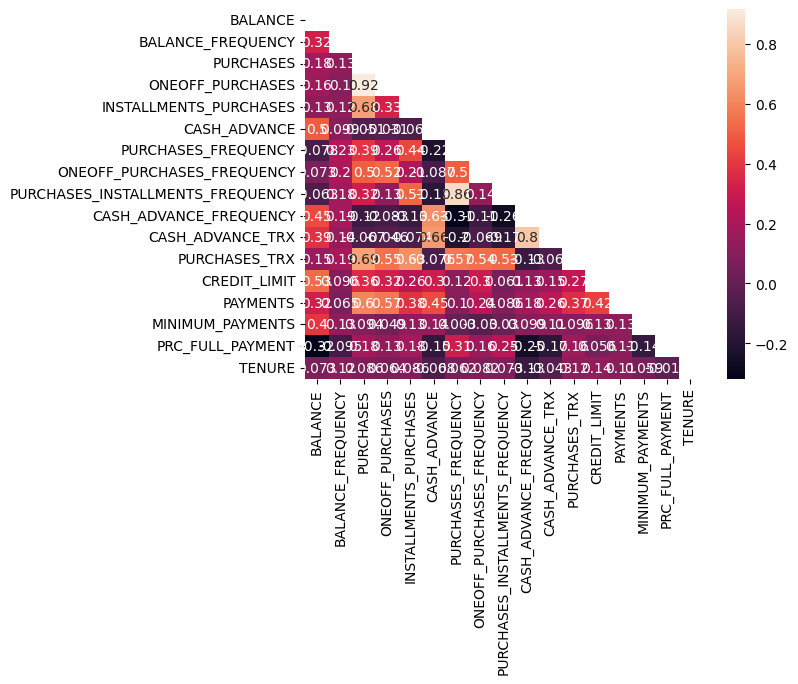

In [24]:
ax = sns.heatmap(df.corr(), annot=True, mask=np.triu(df.corr()))

In [25]:
df.isnull() .sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<span style="color:orange"> 
Valeurs manquantes dans les colonnes : MINIMUM_PAYMENTS et CREDIT_LIMIT </span>

### Prétraitement

##### Nettoyage des données 

<span style="color:orange"> Les données manquantes représentent 3,5 % du dataset, On fait le choix de supprimer les lignes concernées  </span>

In [31]:
df = df.dropna(axis=0)
df.reset_index()

,index,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<span style="color:orange"> Le nombre total de lignes sur l'ensemble de données devient 8636 lignes. </span>

##### Suppression des colonnes itnutiles
<span style="color:orange"> -->  Suppression de la colonne "CUST_ID". </span>


In [36]:
df.drop("CUST_ID",axis=1,inplace=True)

##### ENCODAGE 
ci-besoin 

In [37]:
from sklearn import preprocessing
def onhotencoding(colonne):
        oh = preprocessing.OneHotEncoder()
        for i in df['CUST_ID']:
            df[:,i] = oh.fit_transform(df[:,i])


##### Normalisation 

In [38]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()  
df_norm = norm.fit_transform(df)

### Outlier : detection et décisions

In [60]:
liste_1_5,liste_2,liste_i,liste_1_2=[],[],[],[]
for i in df:
    Q3 = df[i].quantile(0.75)
    Q1 = df[i].quantile(0.25)
    IQ=  Q3 - Q1
    liste_i.append(i)
    if df[(df[i] > (Q3 + 1.2*IQ)) | (df[i] < (Q1 - 1.2*IQ))].any(axis=None):
        liste_1_2.append('OUI')
    else:
        liste_1_2.append('NON')

    if df[(df[i] > (Q3 + 1.5*IQ)) | (df[i] < (Q1 - 1.5*IQ))].any(axis=None):
        liste_1_5.append('OUI')
    else:
        liste_1_5.append('NON')

    if df[(df[i] > (Q3 + 2*IQ)) | (df[i] < (Q1 - 2*IQ))].any(axis=None):
        liste_2.append('OUI')
    else:
        liste_2.append('NON')

outlier_df  = pd.DataFrame({'colonnes':liste_i,'Seuil 1.2':liste_1_2,'Seuil 1.5':liste_1_5,'Seuil 2':liste_2})
print(outlier_df)

                            colonnes Seuil 1.2 Seuil 1.5 Seuil 2
0                            BALANCE       OUI       OUI     OUI
1                  BALANCE_FREQUENCY       OUI       OUI     OUI
2                          PURCHASES       OUI       OUI     OUI
3                   ONEOFF_PURCHASES       OUI       OUI     OUI
4             INSTALLMENTS_PURCHASES       OUI       OUI     OUI
5                       CASH_ADVANCE       OUI       OUI     OUI
6                PURCHASES_FREQUENCY       NON       NON     NON
7         ONEOFF_PURCHASES_FREQUENCY       OUI       OUI     OUI
8   PURCHASES_INSTALLMENTS_FREQUENCY       NON       NON     NON
9             CASH_ADVANCE_FREQUENCY       OUI       OUI     OUI
10                  CASH_ADVANCE_TRX       OUI       OUI     OUI
11                     PURCHASES_TRX       OUI       OUI     OUI
12                      CREDIT_LIMIT       OUI       OUI     OUI
13                          PAYMENTS       OUI       OUI     OUI
14                  MINIM

<span style="color:orange"> Pour ce seuil : 15/17 colonnes ont des valeurs aberrantes pour les trois seuils testés  </span>

<AxesSubplot:xlabel='BALANCE'>

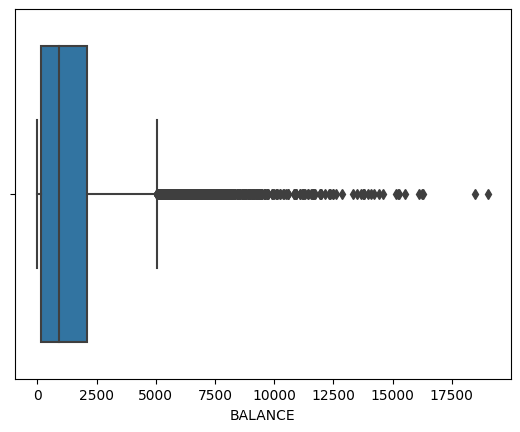

In [64]:
sns.boxplot(x=df["BALANCE"])

<AxesSubplot:xlabel='BALANCE_FREQUENCY'>

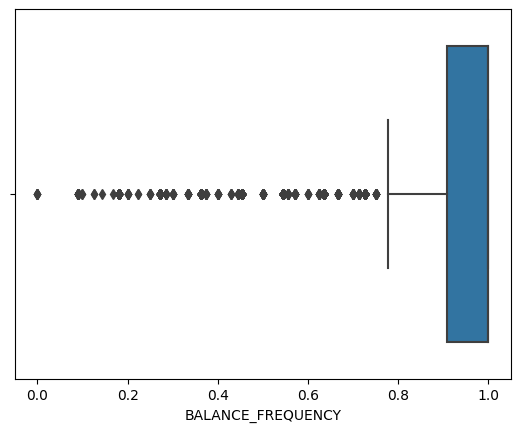

In [65]:

sns.boxplot(x=df["BALANCE_FREQUENCY"])